# Do Not Delete!

In [ ]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [ ]:
# DO NOT REMOVE This
%reload_ext autoreload

In [ ]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

In [ ]:
fis.test_base()

# Import Libraries

In [3]:
# !pip install imblearn

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Resampling Methods
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# Model Tuning and Cross Validation
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

# Model metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve



/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Functions

In [4]:
def make_SMOTE_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    smote = SMOTE(random_state=1)

    pipe = make_pipeline(smote, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# print scores  
    print('Train Accuracy: ' + str(metrics.accuracy_score(y_train, train_predictions)))
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

    return model


In [5]:
def make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 

    RU = RandomUnderSampler(random_state=10)

    pipe = make_pipeline(RU, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# print scores  
    print('Train Accuracy: ' + str(metrics.accuracy_score(y_train, train_predictions)))
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
 
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

    return model


# Data Importing

In [6]:
# csv_name = '/Users/flatironschool/Desktop/Kelly/creditcard.csv'  #put as a string
# df = pd.read_csv(csv_name)

# Data Cleaning

In [7]:
# Dropping duplicate rows
# df.drop_duplicates(inplace=True)

In [8]:
# creating time of day bins 
# secs_per_day = 86400
# secs_per_hour = 3600
# start = 3600 #1am
# period1 = start + 3600*6 #1-7am
# period2 = period1 + 3600*6 #7am-1pm
# period3 = period2 + 3600*6 #1pm-7pm
# period4 = period3 + 3600*5 #7am-12am

In [9]:
# df['time_of_day']=df['Time'].apply(lambda x: x - secs_per_day if x >= secs_per_day else x)

In [10]:
# df['time_of_day']=df['time_of_day'].apply(lambda x: 3 if x<start else x )
# df['time_of_day']=df['time_of_day'].apply(lambda x: 0 if (x>=start) & (x<period1) else x )
# df['time_of_day']=df['time_of_day'].apply(lambda x: 1 if (x>=period1) & (x<period2) else x )
# df['time_of_day']=df['time_of_day'].apply(lambda x: 2 if (x>=period2) & (x<period3) else x )
# df['time_of_day']=df['time_of_day'].apply(lambda x: 3 if (x>=period3) else x )

In [11]:
# df['time_of_day'][(df['time_of_day']<start)] = 3
# df['time_of_day'][(df['time_of_day']>=start) & (df['time_of_day']<period1)] = 0
# df['time_of_day'][(df['time_of_day']>=period1) & (df['time_of_day']<period2)] = 1
# df['time_of_day'][(df['time_of_day']>=period2) & (df['time_of_day']<period3)] = 2
# df['time_of_day'][(df['time_of_day']>=period3)] = 3

In [12]:
# dropping the time column
# df = df.drop(['Time'], axis=1)

In [13]:
# get dummies on time of day column
# x_feats = ['time_of_day']
# df = pd.get_dummies(df, columns=x_feats)

## Save cleaned dataframe

In [14]:
# df.to_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip', index=False)


## Scale Amount column and save again

In [15]:
# Scaling the Amount column
# Note: Scaling for Logisitic Regression, but not for Random Forest Model

# from sklearn.preprocessing import RobustScaler
# rs = RobustScaler()
# amount = pd.DataFrame(df['Amount'])
# amount_scaled = rs.fit_transform(amount)
# df['Amount']=amount_scaled

In [16]:
# df.to_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip', index=False)


# Start with clean data

In [17]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned_scaled = pd.read_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 34 columns):
V1                 283726 non-null float64
V2                 283726 non-null float64
V3                 283726 non-null float64
V4                 283726 non-null float64
V5                 283726 non-null float64
V6                 283726 non-null float64
V7                 283726 non-null float64
V8                 283726 non-null float64
V9                 283726 non-null float64
V10                283726 non-null float64
V11                283726 non-null float64
V12                283726 non-null float64
V13                283726 non-null float64
V14                283726 non-null float64
V15                283726 non-null float64
V16                283726 non-null float64
V17                283726 non-null float64
V18                283726 non-null float64
V19                283726 non-null float64
V20                283726 non-null float64
V21                283726 non

## Exploratory Data Analysis 

In [18]:
1-len(df_cleaned.loc[df_cleaned['Class']==1])/len(df_cleaned)

0.9983328986416472

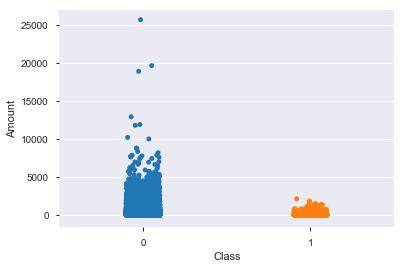

In [19]:
sns.stripplot(df_cleaned['Class'], df_cleaned['Amount'])

Max Fraud Amount: 2125.87
Number of Frauds above Quantile 3: 118


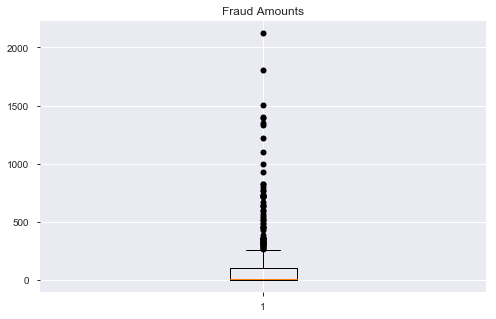

In [20]:
plt.figure(figsize=(8,5))
df_fraud = df_cleaned.loc[df_cleaned['Class']==1]
plt.boxplot(df_fraud['Amount'], showfliers=True, sym='k')
plt.title("Fraud Amounts")
print("Max Fraud Amount:", df_fraud['Amount'].max())
print("Number of Frauds above Quantile 3:", len(df_fraud.loc[df_fraud['Amount'] > df_fraud['Amount'].quantile(.75)]))

## Train-Test Split (without scaling)

In [21]:
X = df_cleaned.drop(['Class'], axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])


No. of samples in each training set: 198608
No. of samples in each test set: 85118


## Train-Test Split (with scaling)

In [22]:
X = df_cleaned_scaled.drop(['Class'], axis=1)
y = df_cleaned_scaled['Class']

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

## Gaussian Bayes

Train Accuracy: 0.9745931684524289
Train Precision: 0.05392620624408704
Train Recall: 0.8610271903323263
Train F1: 0.1014957264957265


Test Accuracy: 0.9750581545619023
Test Precision: 0.05282167042889391
Test Recall: 0.823943661971831
Test F1: 0.0992787441663131


Confusion Matrix: 
TN: 82878 FP: 2098 FN: 25 TP: 117


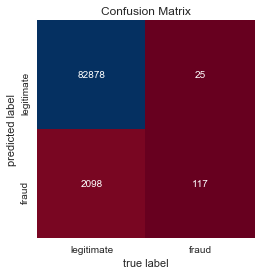

In [232]:
nb_smote_model = make_SMOTE_model(X_train, y_train, X_test, y_test, GaussianNB())

Train Accuracy: 0.949473334407476
Train Precision: 0.028107372106594048
Train Recall: 0.8731117824773413
Train F1: 0.05446150946951851


Test Accuracy: 0.9497756056298315
Test Precision: 0.02787297235549463
Test Recall: 0.8591549295774648
Test F1: 0.053994246514715634


Confusion Matrix: 
TN: 80721 FP: 4255 FN: 20 TP: 122


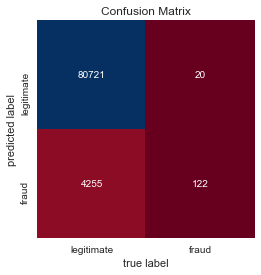

In [233]:
nd_ru_model = make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, GaussianNB())

## KNN

In [ ]:
knn_smote_model = make_SMOTE_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, KNeighborsClassifier(n_neighbors=9))

In [ ]:
make_RandomUnderSampler_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, KNeighborsClassifier(n_neighbors=9))

## Logistic Regression

Train Accuracy: 0.9311407395472489
Train Precision: 0.022745154137758388
Train Recall: 0.9607250755287009
Train F1: 0.04443823365008385


Test Accuracy: 0.9320120303578562
Test Precision: 0.02152907272419054
Test Recall: 0.8943661971830986
Test F1: 0.04204601887104784


Confusion Matrix: 
TN: 79204 FP: 5772 FN: 15 TP: 127


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=1, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('logisticregression',
                 LogisticRegression(C=1000000000000.0,
                                    class_weight={0: 1, 1: 3}, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

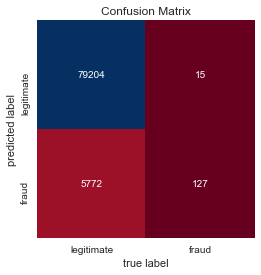

In [234]:
make_SMOTE_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 3}))

Train Accuracy: 0.9193335615886571
Train Precision: 0.0197134810824048
Train Recall: 0.972809667673716
Train F1: 0.038643864386438645


Test Accuracy: 0.9193825042881647
Test Precision: 0.01834862385321101
Test Recall: 0.9014084507042254
Test F1: 0.03596515875245856


Confusion Matrix: 
TN: 78128 FP: 6848 FN: 14 TP: 128


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('logisticregression',
                 LogisticRegression(C=1000000000000.0,
                                    class_weight={0: 1, 1: 3}, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

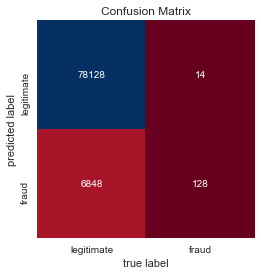

In [235]:
make_RandomUnderSampler_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 3}))

## Random Forest

Train Accuracy: 0.9994108998630468
Train Precision: 0.7431818181818182
Train Recall: 0.9879154078549849
Train F1: 0.8482490272373541


Test Accuracy: 0.9989191475363612
Test Precision: 0.6388888888888888
Test Recall: 0.8098591549295775
Test F1: 0.7142857142857142


Confusion Matrix: 
TN: 84911 FP: 65 FN: 27 TP: 115


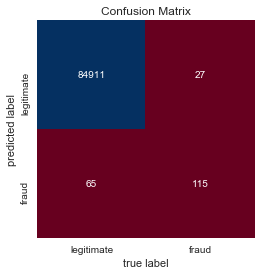

In [236]:
rm_smote_model = make_SMOTE_model(X_train, y_train, X_test, y_test, RandomForestClassifier(max_depth=12, n_estimators=30))



In [237]:
pred_proba = rm_smote_model.predict_proba(X_train)
pred_proba

array([[9.67151685e-01, 3.28483148e-02],
       [9.99691885e-01, 3.08114679e-04],
       [9.98298441e-01, 1.70155888e-03],
       ...,
       [9.99766774e-01, 2.33225720e-04],
       [9.90818979e-01, 9.18102052e-03],
       [9.90220593e-01, 9.77940675e-03]])

In [238]:
probs = pd.DataFrame(pred_proba, columns=['prob_legit', 'prob_fraud'])
probs['actual']=[i for i in y_train]
probs.head()

,prob_legit,prob_fraud,actual
0,0.967152,0.032848,0
1,0.999692,0.000308,0
2,0.998298,0.001702,0
3,0.972016,0.027984,0
4,0.994362,0.005638,0


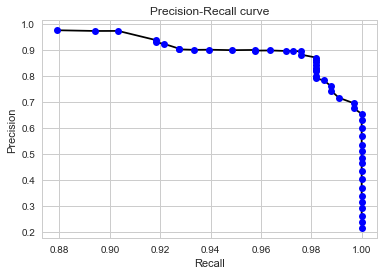

In [239]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

names = ['cut_off', 'recall', 'precision']
fraud_metrics = pd.DataFrame()

# for loop to test different cut-off values
for i in frange(.2,.95,.015):
    probs['label'] = np.where(probs['prob_fraud'] >= i, 1, 0)
    tn, fp, fn, tp = confusion_matrix(probs['actual'], probs['label']).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    evals = [i,recall,precision]
    fraud_metrics=fraud_metrics.append(pd.Series(evals), ignore_index=True)

fraud_metrics.columns = names

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
# plot the data
plt.plot(fraud_metrics.recall, fraud_metrics.precision , '-', color='black')
plt.plot(fraud_metrics.recall, fraud_metrics.precision , 'o', color='blue')

# make some nice labels
plt.title('Precision-Recall curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


Train Accuracy: 0.9819342624667687
Train Precision: 0.08446032151058944
Train Recall: 1.0
Train F1: 0.15576470588235294


Test Accuracy: 0.9819309664230832
Test Precision: 0.07387057387057387
Test Recall: 0.852112676056338
Test F1: 0.1359550561797753


Confusion Matrix: 
TN: 83459 FP: 1517 FN: 21 TP: 121


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 1, 1: 3},
                                        criterion='gini', max_depth=12,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=30, n_jobs=None,
                    

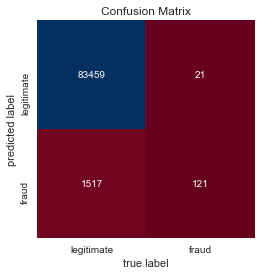

In [240]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, RandomForestClassifier(max_depth=12, n_estimators=30, class_weight={0: 1, 1: 3}))



## Gridsearch to find model with best parameters

In [19]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [70]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier(class_weight={0: 1, 1: 2}, n_estimators=30, n_jobs=3)

from imblearn.pipeline import Pipeline

pipe = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 12],
    'classifier__min_samples_split': [8, 10],
}

gs = GridSearchCV(pipe, param_grid, cv = 5, scoring='f1')
gs.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=1, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight={0: 1,
                                                                             1: 2},
                                                               crit...
                              

In [71]:
gs.best_params_

{'classifier__max_depth': 12, 'classifier__min_samples_split': 8}

In [162]:
test_predictions = gs.predict(X_test)
test_probabilities = gs.predict_proba(X_test)
test_probabilities

array([[9.91705721e-01, 8.29427911e-03],
       [9.99734149e-01, 2.65851326e-04],
       [9.86693886e-01, 1.33061136e-02],
       ...,
       [9.65904007e-01, 3.40959930e-02],
       [9.53210863e-01, 4.67891371e-02],
       [9.87507074e-01, 1.24929258e-02]])

Test Accuracy: 0.9982259921520712
Test Precision: 0.4810126582278481
Test Recall: 0.8028169014084507
Test F1: 0.6015831134564643


Confusion Matrix: 
TN: 84853 FP: 123 FN: 28 TP: 114


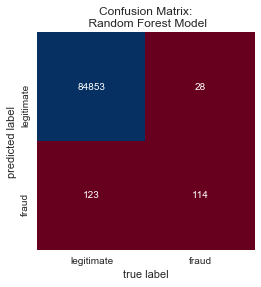

In [178]:
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
print('\n')
    

# print confusion matrix    
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
plt.title('Confusion Matrix:\n Random Forest Model')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('cm_randomforest')

tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

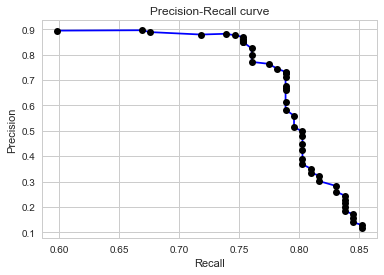

<Figure size 432x288 with 0 Axes>

In [127]:
probs = pd.DataFrame(test_probabilities, columns=['prob_legit', 'prob_fraud'])
probs['actual']=[i for i in y_test]
probs.head()

# # print 
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

names = ['cut_off', 'recall', 'precision']
fraud_metrics = pd.DataFrame()

# for loop to test different cut-off values
for i in frange(.2,.95,.015):
    probs['label'] = np.where(probs['prob_fraud'] >= i, 1, 0)
    tn, fp, fn, tp = confusion_matrix(probs['actual'], probs['label']).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    evals = [i,recall,precision]
    fraud_metrics=fraud_metrics.append(pd.Series(evals), ignore_index=True)

fraud_metrics.columns = names

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
# plot the data
plt.plot(fraud_metrics.recall, fraud_metrics.precision , '-', color='blue')
plt.plot(fraud_metrics.recall, fraud_metrics.precision , 'o', color='black')
# make some nice labels
plt.title('Precision-Recall curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
plt.savefig('pr_curve')

In [139]:
pred_vs_actual = pd.DataFrame({"Amount": X_test['Amount'], "Predicted": test_predictions, "Actual": [i for i in y_test]})

In [149]:
pred_vs_actual.loc[(pred_vs_actual['Predicted']==0) & (pred_vs_actual['Actual']==1)]['Amount'].describe()

count      28.000000
mean      153.013571
std       428.684464
min         0.000000
25%         1.000000
50%         7.790000
75%        43.155000
max      2125.870000
Name: Amount, dtype: float64

In [168]:
max_amount = df_cleaned.loc[df_cleaned['Amount']==2125.87]
# gs.predict(max_amount)
max_amount = max_amount.drop(['Class'], axis=1)
gs.predict_proba(max_amount)

array([[0.95108177, 0.04891823]])

## Gridsearch to find model with best parameters(manual change of threshhold)

In [75]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier(n_estimators=30, n_jobs=3)

from imblearn.pipeline import Pipeline

pipe = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 12],
    'classifier__min_samples_split': [8, 10],
}

gs2 = GridSearchCV(pipe, param_grid, cv = 5, scoring='f1')
gs2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=1, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion...
                                                               min_samples_leaf=1,
                           

In [76]:
gs2.best_params_

{'classifier__max_depth': 12, 'classifier__min_samples_split': 10}

In [241]:
test_predictions2 = gs2.predict(X_test)
test_probabilities2 = gs2.predict_proba(X_test)

In [248]:
# threshold .33 chance of fraud
probs2 = pd.DataFrame(test_probabilities2, columns=['prob_legit', 'prob_fraud'])
probs2['predicted'] = probs2['prob_fraud'].apply(lambda x: 1 if x>0.33 else 0)

Test Accuracy: 0.9977090627129397
Test Precision: 0.4070175438596491
Test Recall: 0.8169014084507042
Test F1: 0.5433255269320844


Confusion Matrix: 
TN: 84807 FP: 169 FN: 26 TP: 116


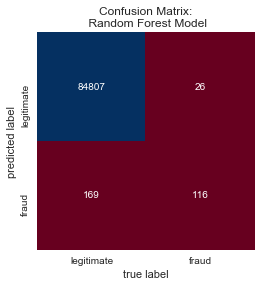

In [249]:
# print confusion matrix  

print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, probs2['predicted'])))
print('Test Precision: ' + str(metrics.precision_score(y_test, probs2['predicted'])))
print('Test Recall: ' + str(metrics.recall_score(y_test, probs2['predicted'])))
print('Test F1: ' + str(metrics.f1_score(y_test, probs2['predicted'])))
print('\n')

cm = confusion_matrix(y_test, probs2['predicted'])
sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
plt.title('Confusion Matrix:\n Random Forest Model')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('cm_randomforest')

tn, fp, fn, tp = confusion_matrix(y_test, probs2['predicted']).ravel()
print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

In [23]:
y_test.sum()

142

In [ ]:
# Adam's Code

# classifier = DecisionTreeClassifier(random_state=10)
# classifier.fit(X_res, y_res)
# y_pred = classifier.predict(X_test)

# acc = accuracy_score(y_test,y_pred) * 100
# print("Accuracy is : {}%".format(round(acc, 2)))
# #     # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print("\nAUC is :{0}".format(round(roc_auc,2)))
#     # Create and print a confusion matrix
# print('\nConfusion Matrix')
# print('----------------')
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# # Train a DT classifier
# classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
# classifier2.fit(X_res, y_res)
#     # Make predictions for test data
# y_pred = classifier2.predict(X_test)
#     # Calculate Accuracy
# acc = accuracy_score(y_test,y_pred) * 100
# print("Accuracy is :{0}".format(acc))
#     # Check the AUC for predictions
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print("\nAUC is :{0}".format(round(roc_auc,2)))
#     # Create and print a confusion matrix
# print('\nConfusion Matrix')
# print('----------------')
# print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# # Function for plotting feature importance
# classifier2.feature_importances_ # How much does this feature reduce entropy
#     # Function to show importance of each feature
# def plot_feature_importances(model):
#     '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), X_train.columns.values)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
# plot_feature_importances(classifier2)
#     # confusion matrix print
# pred = classifier2.predict(X_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

# # Random Forest in code
# forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
# forest.fit(X_train, y_train)
# forest.score(X_train, y_train) # Accuracy of training data
# forest.score(X_test, y_test) # Accuracy of test data
# plot_feature_importances(forest) # plot using function above

# # Fine Tune the model
# forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
# forest_2.fit(X_train, y_train)
# forest_2.score(X_train, y_train) # Accuracy of training data
# forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gs.fit(X_res, y_res)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)


In [173]:
len(df_cleaned.loc[df_cleaned['Amount']>1000])

2935